## Why ELMO?

ELMO is a new type of deep contextualized word representation of complex word characteristics.

We are familiar with [Word2Vec](https://malaya.readthedocs.io/en/latest/Word2vec.html), it is a really good approach to understand semantic definitions or synonym of words, but problem with Word2Vec, any words that are not inside the dictionary, it will treated as `UNKNOWN` token. We cannot capture all the words for our language, it will consumed a lot of space and power to calculate!

And we also familiar with [Fast-text](https://malaya.readthedocs.io/en/latest/Fasttext.html), it’s designed to solve OOV(Out-of-Vocabulary) issue. But problem with Fast-text, the semantic definitions are not really accurate because the dictionary is Character N-gram based.

Good thing about ELMO, it learn to generalize word-based dictionary based on character representation, combined with CNN + RNN, and boom, we got ELMO!

You can read more about [ELMO here](https://arxiv.org/abs/1802.05365).

## Pretrained ELMO

#### ELMO from wikipedia

[size-128, 700k unique words](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v20/elmo/elmo-128.pkl)

You will get a pickle file, contains `['softmax_weight', 'dictionary']`.

To load that pickle file,
```python
import pickle
with open('file.pkl', 'rb') as fopen:
    elmo = pickle.load(fopen)
```

But this pickle cannot do much if you have out-of-vocab words!, so better use `malaya.elmo.load_wiki()`!

In [1]:
%%time
import malaya
%matplotlib inline

CPU times: user 12.8 s, sys: 1.58 s, total: 14.4 s
Wall time: 18.2 s


## Load malaya wikipedia ELMO

In [2]:
%%time
elmo = malaya.elmo.load_wiki()

CPU times: user 9.66 s, sys: 3.37 s, total: 13 s
Wall time: 14.6 s


## Get embedding from a word

If you check [get embedding from word2vec](https://malaya.readthedocs.io/en/latest/Word2vec.html#get-embedding-from-a-word), any word / string not included in the dictionary, it will throw `Exception: input not found in dictionary`.

ELMO will never have this kind of problem, ELMO learn from characters representations.

In [3]:
elmo.get_vector_by_name('najib razak').shape

(128,)

In [4]:
elmo.get_vector_by_name('najib razak dengan mahathir').shape

(128,)

But, we cannot put a string that contains more than 20 words, that's depends during training parameter session.

In [5]:
elmo.get_vector_by_name('mahathir ' * 20).shape

ValueError: input must have less than 20 words

## Check top-k similar semantics based on a word

In [6]:
word = 'anwar ibrahim'
print("Embedding layer: 8 closest words to: '%s'"%(word))
print(elmo.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar ibrahim'
[['mohamed', 0.6042279005050659], ['ramli', 0.5735872983932495], ['yusof', 0.5597462058067322], ['sulaiman', 0.5592684149742126], ['omar', 0.55012446641922], ['ali', 0.5446622371673584], ['abdullah', 0.5382182002067566], ['kadir', 0.5373321175575256]]


## Check batch top-k similar semantics based on a word

In [7]:
words = ['anwar ibrahim', 'dr mahathir mohammad']
elmo.batch_n_closest(words, num_closest = 8, return_similarity = True,
                    mode_sequence = 'last')

[[('ibrahim', 0.5931666),
  ('mohamed', 0.57938087),
  ('omar', 0.54630095),
  ('ali', 0.52854496),
  ('abdullah', 0.5230521),
  ('yusof', 0.5169302),
  ('othman', 0.51660293),
  ('hussein', 0.50562495)],
 [('ibrahim', 0.60006213),
  ('omar', 0.5904051),
  ('yahya', 0.5790444),
  ('hassan', 0.57043797),
  ('abdullah', 0.56728643),
  ('harun', 0.56576926),
  ('hussin', 0.5632854),
  ('ali', 0.5622907)]]

In [8]:
words = ['anwar ibrahim', 'dr mahathir mohammad']
elmo.batch_n_closest(words, num_closest = 8, return_similarity = True,
                    mode_sequence = 'mean')

[[('ibrahim', 0.6224059),
  ('mohamed', 0.5902999),
  ('abdullah', 0.57405645),
  ('ramli', 0.5661162),
  ('omar', 0.558924),
  ('sulaiman', 0.5572471),
  ('ali', 0.5569948),
  ('yusof', 0.55097383)],
 [('hashim', 0.5647713),
  ('omar', 0.5587351),
  ('ibrahim', 0.55244577),
  ('hassan', 0.545943),
  ('mohd', 0.54150975),
  ('din', 0.54006946),
  ('hussin', 0.5291501),
  ('ali', 0.52802)]]

## Calculate vb - va + vc

In [9]:
print(elmo.analogy('anwar', 'penjara', 'kerajaan', 5, mode_sequence = 'last'))

['penjara', 'kerajaan', 'tentera', 'gaza', 'masyarakat']


## Visualize scatter-plot

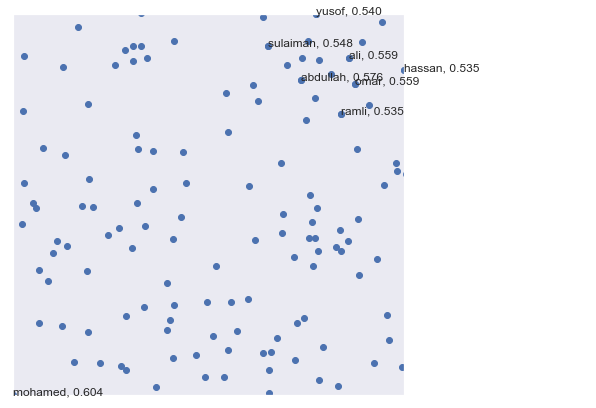

In [13]:
word = 'anwar ibrahim'
result = elmo.n_closest(word=word, num_closest=8, metric='cosine')
elmo.scatter_plot(result, centre = word, notebook_mode = True)

## Visualize tree-plot

<Figure size 504x504 with 0 Axes>

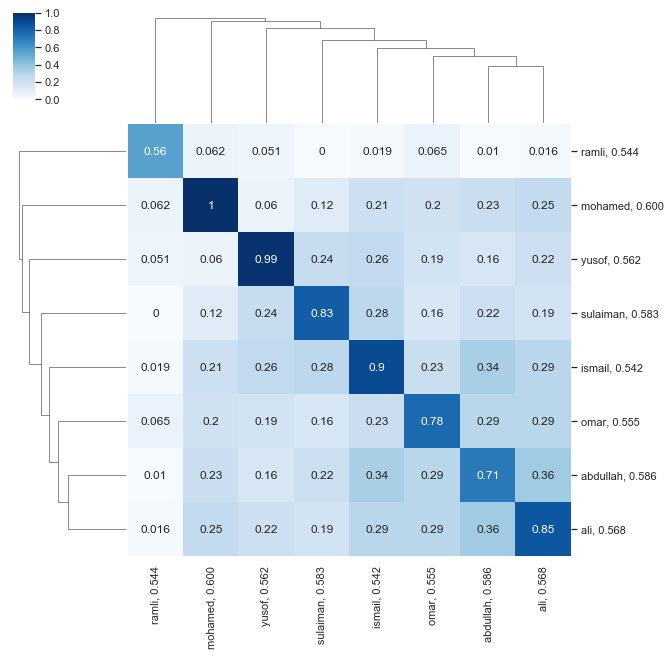

In [11]:
word = 'anwar ibrahim'
result = elmo.n_closest(word=word, num_closest=8, metric='cosine')
elmo.tree_plot(result, notebook_mode = True)